# Zad 1.  
Zbadamy ewolucję układu na sieci kwadratowej o rozmiarze 100 ×100 dla początkowego losowego rozkładu dwóch opinii w układzie. Sporządzamy również wykres liczby opinii na ‘tak’ od czasu. Przyjmijmy sekwencyjny schemat aktualizacji opinii.  

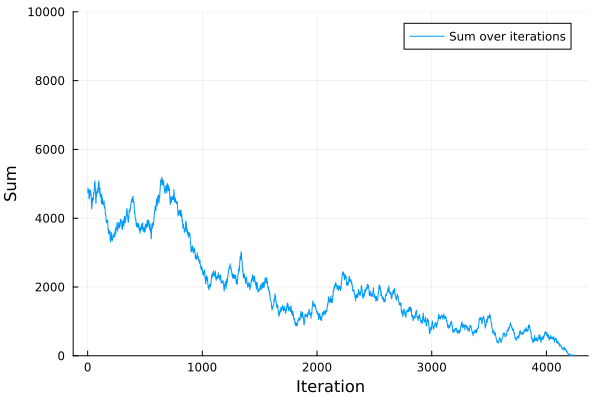

In [72]:
using Random, Plots

L = 100
network = round.(rand(L, L))  # Initialize LxL matrix with 0s and 1s
i = 0
yesses = []

while 0 < sum(network) < L^2 && i < 100_000
    i += 1
    temp = zeros(L, L)

    for x in 1:L
        for y in 1:L
            decision = rand(1:4)
            if decision == 1
                choice = network[mod1(x - 1, L), y]  # Up (wrap around)
            elseif decision == 2
                choice = network[mod1(x + 1, L), y]  # Down (wrap around)
            elseif decision == 3
                choice = network[x, mod1(y - 1, L)]  # Left (wrap around)
            else
                choice = network[x, mod1(y + 1, L)]  # Right (wrap around)
            end
            network[x, y] = choice
        end
    end

    push!(yesses, sum(network))
end

println("Iterations: ", i)
plot(yesses, label="Sum over iterations", xlabel="Iteration", ylabel="Sum", ylim=(0, L^2))
# hline(5000)

# Zad 2.  
Powtarzamy dziesięciokrotnie symulacje mierząc średni czasy dojścia do konsensusu (dziesieć różnych punktów startowych). Wyznaczamy średnią z tych dziesięciu pomiarów i niepewność jej wyznaczenia.  
# Zad 3.  
Sprawdźmy czy i jak średni czas dojścia do konsensusu (z dziesięciu realizacji) zależy od rozmiaru układu L2? Przyjmijmy L= 10, 50, 100, 200.

# Sprawozdanie

Wprowadzenie (25 pkt.) Zdefiniowanie modelu, opisanie problemu.  
Wyniki (50 pkt.)  
    ad 1: kilka wizualizacji sieci w kolejnych krokach czasowych. Wykres zależności czasowej liczby kroków na „tak”.  
    ad 2: Średnia z czasów dojścia do konsensusu wraz z jej niepewnością (odchyleniem standardowym średniej).  
    ad 3: Wykres τ(L2).  
Wnioski (25 pkt.) Jakie zjawisko udało się zaobserwować? W jaki sposób zmienia się czas dochodzenia
do konsensusu z liczbą aktorów?